## PSD of BaroData

In [23]:
import matplotlib.pyplot as plt
import pickle, os


from andbro__querrySeismoData import __querrySeismoData
from obspy import UTCDateTime, read, Stream, Trace
from scipy.signal import welch
from numpy import log10, zeros, append, linspace, mean, median, array, where, transpose, shape, histogram
from pandas import DataFrame, concat, Series, date_range, to_pickle, read_csv
from pathlib import Path
from andbro__load_FURT_stream import __load_furt_stream

import warnings
warnings.filterwarnings('ignore')

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

# IROMY DATA

BDF
BDI
BDO
3 Trace(s) in Stream:
BW.IROMY..BDF | 2023-08-13T00:00:00.005000Z - 2023-08-19T23:59:59.980000Z | 40.0 Hz, 24192000 samples
BW.IROMY..BDI | 2023-08-13T00:00:00.005000Z - 2023-08-19T23:59:59.980000Z | 40.0 Hz, 24192000 samples
BW.IROMY..BDO | 2023-08-13T00:00:00.005000Z - 2023-08-19T23:59:59.980000Z | 40.0 Hz, 24192000 samples


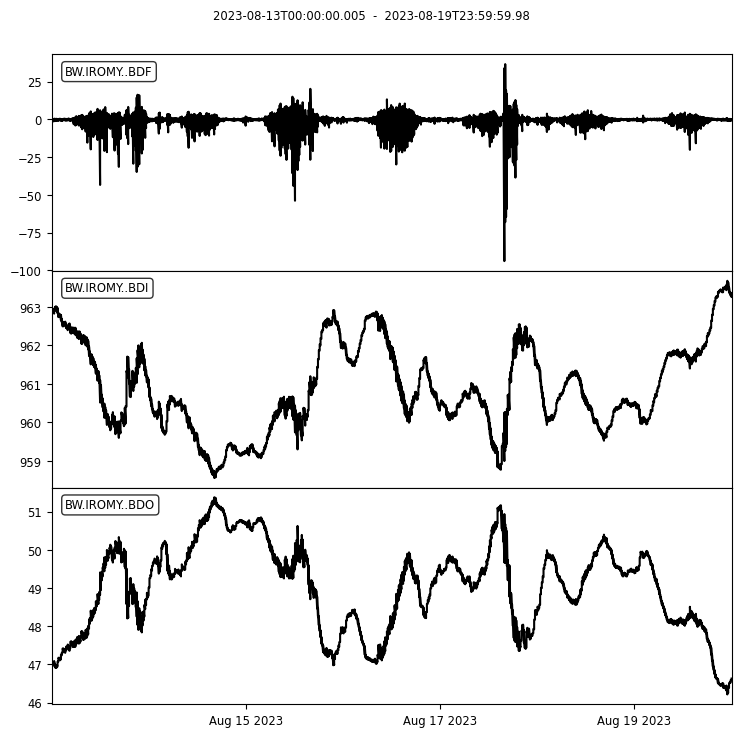

In [14]:
from andbro__read_sds import __read_sds
from obspy import read_inventory

tbeg, tend = "2023-08-13","2023-08-20"

st = __read_sds("/import/kilauea-data/LNM2/mb2000/sds/", "BW.IROMY..BD*", tbeg, tend)

for tr in st:
    if "DF" in tr.stats.channel:
        tr.data = tr.data /1.0 /6.28099e5 /0.02  # gain=1 sensitivity_reftek=6.28099e5count/V; sensitivity_mb2005=0.02 V/Pa
    elif "DI" in tr.stats.channel:
        tr.data = tr.data /1.0 /6.28099e5 /1e-3  # gain=1 sensitivity_reftek=6.28099e5count/V; sensitivity = 1 mV/hPa
    elif "DO" in tr.stats.channel:
        tr.data = tr.data /1.0 /6.28099e5 /100e-3   # gain=1 sensitivity_reftek=6.28099e5count/V; sensitivity = 100 mV/hPa

print(st)

st.plot(equal_scale=False);

In [10]:
# inv = read_inventory("/home/brotzer/Documents/ROMY/ROMY_infrasound/IROMY.xml", format="STATIONXML", level="response")
# inv = read_inventory("/home/brotzer/Documents/ROMY/ROMY_infrasound/IROMY_resp.xml", format="STATIONXML", level="response")

## PROMY Data

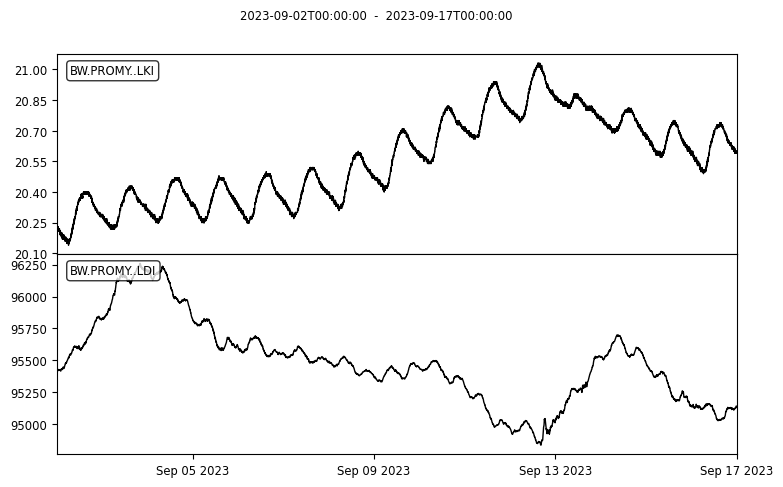

In [83]:
tbeg, tend = "2023-09-01","2023-09-17"

promy = __read_sds("/import/kilauea-data/LNM2/infrasound/", "BW.PROMY..*", tbeg, tend)

promy.plot(equal_scale=False);

# Dino Data

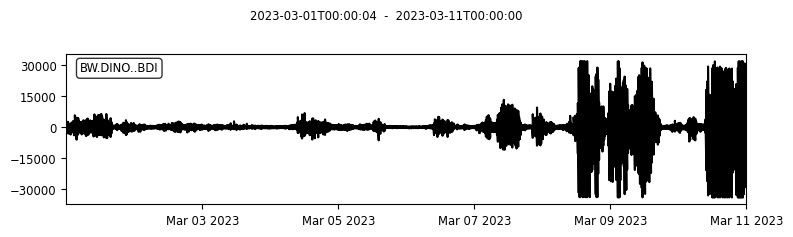

In [85]:
tbeg, tend = "2023-03-01","2023-03-11"

dino = __read_sds("/import/kilauea-data/LNM2/infrasound/", "BW.DINO..*", tbeg, tend)

dino.plot(equal_scale=False);